In [83]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F

torch.set_printoptions(linewidth=999, precision=4, sci_mode=False)

from Net.experiments.main_experiment import HOMO12, HOMO21, KP1, KP2, SCORE1, SCORE2, KP1_SCORE, KP2_SCORE, W_KP1, W_KP2
from Net.experiments.custom_experiments import DebugTrainExperiment
from Net.source.utils.common_utils import draw_cv_keypoints, torch2cv, plot_figures
from Net.source.utils.image_utils import warp_image, select_keypoints, filter_border
from Net.source.utils.eval_utils import repeatability_score
from Net.source.hpatches_dataset import S_IMAGE1, S_IMAGE2

In [97]:
device = torch.device('cpu')

checkpoint_dir = "/Users/apple/PycharmProjects/Summertime/Net/checkpoints/debug_train"

experiment = DebugTrainExperiment(device, None, checkpoint_dir, 100)

In [98]:
batch = experiment.analyze_inference()

In [99]:
cv_s_image1 = torch2cv(batch[S_IMAGE1].squeeze(0))
cv_s_image2 = torch2cv(batch[S_IMAGE2].squeeze(0))

kp1 = batch[KP1]
kp2 = batch[KP2]

w_kp1 = batch[W_KP1]
w_kp2 = batch[W_KP2]

score1 = batch[SCORE1]
score2 = batch[SCORE2]

kp1_score = batch[KP1_SCORE]
kp2_score = batch[KP2_SCORE]

homo12 = batch[HOMO12]
homo21 = batch[HOMO21]

In [100]:
w_score2 = warp_image(score1, score2, homo12)

In [101]:
cv_score1 = cv2.cvtColor(torch2cv(score1.squeeze(0) / score1.max()),cv2.COLOR_GRAY2RGB)
cv_kp1_score = cv2.cvtColor(torch2cv(kp1_score.squeeze(0) / kp1_score.max()),cv2.COLOR_GRAY2RGB)
cv_kp1_image = draw_cv_keypoints(cv_s_image1, kp1.squeeze(0), (0, 255, 0))

cv_score2 = cv2.cvtColor(torch2cv(score2.squeeze(0) / score2.max()),cv2.COLOR_GRAY2RGB)
cv_kp2_score = cv2.cvtColor(torch2cv(kp2_score.squeeze(0) / kp2_score.max()), cv2.COLOR_GRAY2RGB)
cv_kp2_image = draw_cv_keypoints(cv_s_image2, kp2.squeeze(0), (0, 255, 0))

cv_w_score2 = cv2.cvtColor(torch2cv(w_score2.squeeze(0) / w_score2.max()), cv2.COLOR_GRAY2RGB)

In [116]:
_, t_kp2 = select_keypoints(filter_border(score2), 0, 5, 512)
_, t_w_kp2 = select_keypoints(w_score2, 0, 5, 512)

cv_t_kp2_image = draw_cv_keypoints(cv_s_image2, t_kp2.squeeze(0), (0, 255, 0))
cv_t_w_kp2_image = draw_cv_keypoints(torch2cv(filter_border(batch[S_IMAGE1].float()).squeeze(0)), t_w_kp2.squeeze(0), (0, 255, 0))

In [117]:
print(repeatability_score(kp1, w_kp2, kp2, 512, 5))
print(repeatability_score(kp1, t_w_kp2, kp2, 512, 5))

(tensor(0.3398), tensor([[[247, 385],
         [  0,   0],
         [173,  82],
         ...,
         [  0,   0],
         [  0,   0],
         [  0,   0]]]), tensor([[[227, 294],
         [  0,   0],
         [163, 143],
         ...,
         [  0,   0],
         [  0,   0],
         [  0,   0]]]))
(tensor(0.3965), tensor([[[247, 385],
         [  0,   0],
         [173,  82],
         ...,
         [  0,   0],
         [  0,   0],
         [  0,   0]]]), tensor([[[259, 229],
         [  0,   0],
         [162, 260],
         ...,
         [  0,   0],
         [  0,   0],
         [  0,   0]]]))


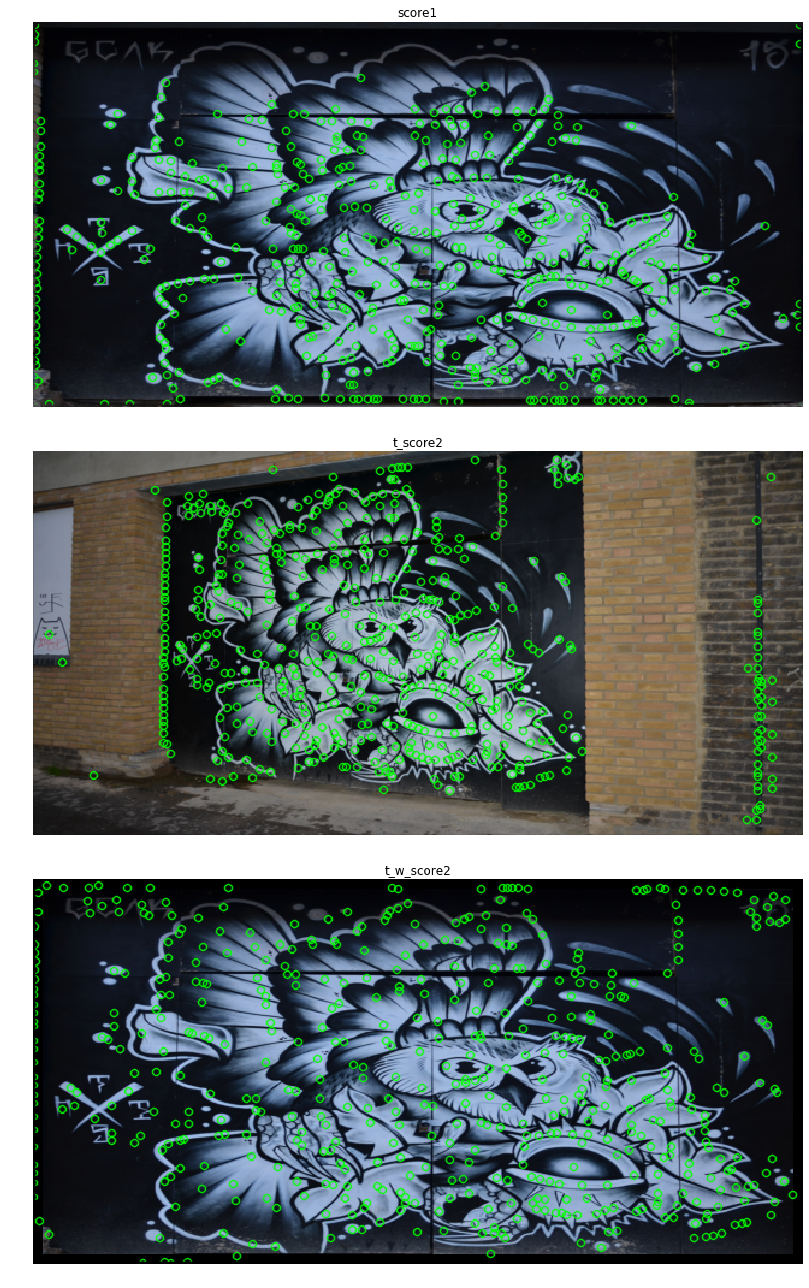

In [118]:
plot_figures({'score1': cv_kp1_image,
              't_score2': cv_t_kp2_image,
              't_w_score2': cv_t_w_kp2_image}, 3, 1, (18, 18))

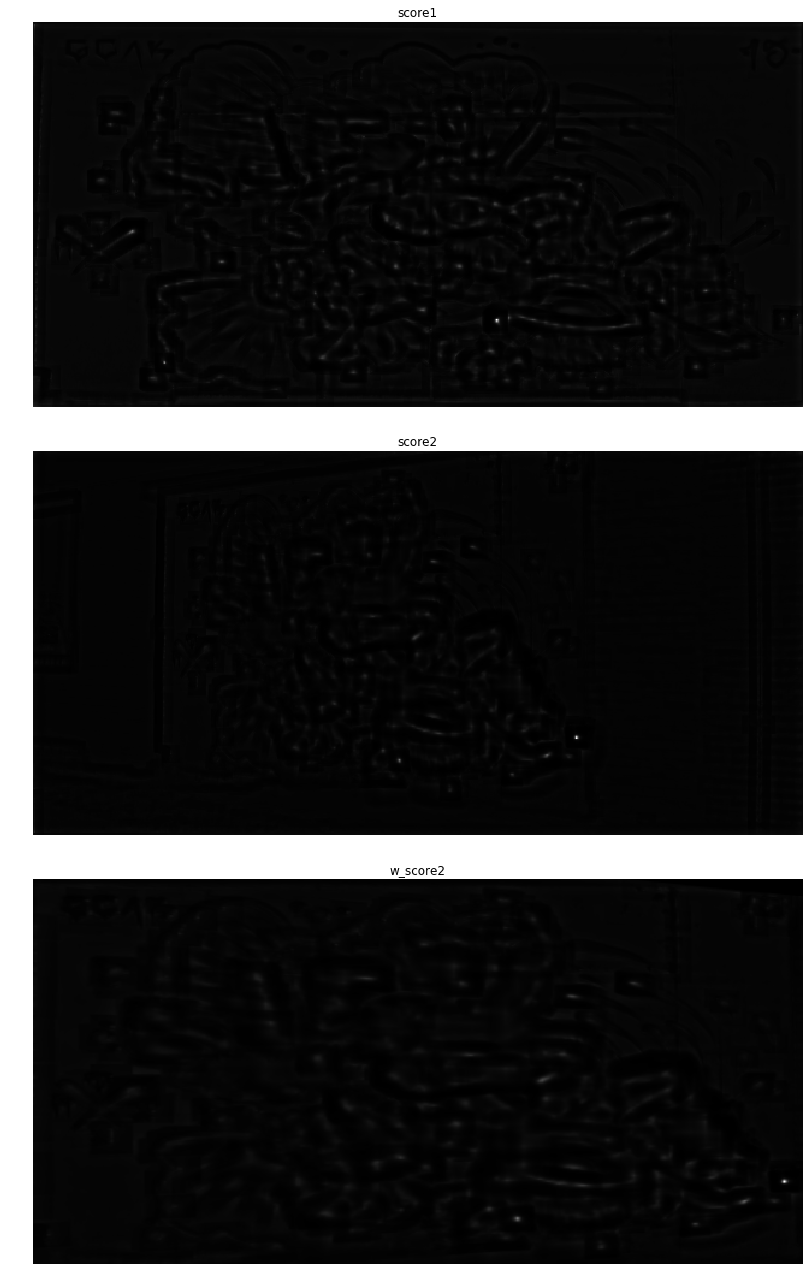

In [92]:
plot_figures({'score1': cv_score1,
              'score2': cv_score2,
              'w_score2': cv_w_score2}, 3, 1, (18, 18))